In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import mysql.connector


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score

In [3]:
Dataframe=pd.read_csv(r"C:/Users/Hp/OneDrive/Desktop/loan_default.csv")

In [5]:
Dataframe['HasCoSigner']=Dataframe['HasCoSigner'].replace({"Yes": 1, "No": 0})

C:\Users\Hp\AppData\Local\Temp\ipykernel_2672\3215141973.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Dataframe['HasCoSigner']=Dataframe['HasCoSigner'].replace({"Yes": 1, "No": 0})


In [7]:
Dataframe['HasMortgage']=Dataframe['HasMortgage'].replace({"Yes": 1, "No": 0})

C:\Users\Hp\AppData\Local\Temp\ipykernel_2672\3105073674.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Dataframe['HasMortgage']=Dataframe['HasMortgage'].replace({"Yes": 1, "No": 0})


In [8]:
df=Dataframe.sample(n=5000,random_state=1)

In [9]:
df.to_csv("Data_set.csv")

In [3]:
Data_set=pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\Banking proj\Data_set.csv")

In [74]:
loanrepayment=Data_set.groupby("LoanPurpose")["LoanAmount"].value_counts()

In [75]:
loanrepayment

LoanPurpose  LoanAmount
Auto         17405         2
             47186         2
             117549        2
             230392        2
             234227        2
                          ..
Other        247704        1
             248614        1
             248691        1
             249302        1
             249782        1
Name: count, Length: 4979, dtype: int64

In [3]:
Data_set

,Unnamed: 0,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,96230,BAAZ3N0MQ2,27,52584,60095,767,110,3,2.10,60,0.90,Bachelor's,Full-time,Married,0,Yes,Home,0,0
1,73292,MA13MARGJ5,35,52120,110208,719,86,2,17.15,12,0.86,PhD,Part-time,Divorced,1,Yes,Education,1,0
2,45552,NLXKBIUR0W,55,97782,85908,629,26,1,18.67,12,0.42,High School,Self-employed,Divorced,1,Yes,Education,0,0
3,121878,J2YSSCJ9OY,19,59024,24842,482,114,4,16.79,12,0.41,High School,Full-time,Married,1,No,Education,0,0
4,192411,LAXP6SKZDF,46,136634,171566,477,4,2,2.81,48,0.31,High School,Unemployed,Single,1,Yes,Education,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,191837,XMUBKMFYTD,41,142712,33360,402,59,1,19.07,12,0.32,PhD,Full-time,Divorced,1,No,Home,0,0
4996,16690,ZPJ92H086Y,66,124548,95635,610,38,4,23.33,24,0.56,Master's,Part-time,Married,1,Yes,Other,0,0
4997,244773,SIA7P8BJS7,20,103547,246193,471,108,2,2.01,48,0.63,High School,Unemployed,Married,0,No,Education,0,0
4998,163950,LHR9PAO8QB,46,69170,199029,688,100,4,16.22,36,0.44,Master's,Full-time,Married,1,Yes,Home,0,0


Text(0.5, 1.0, 'Distribution of Loan')

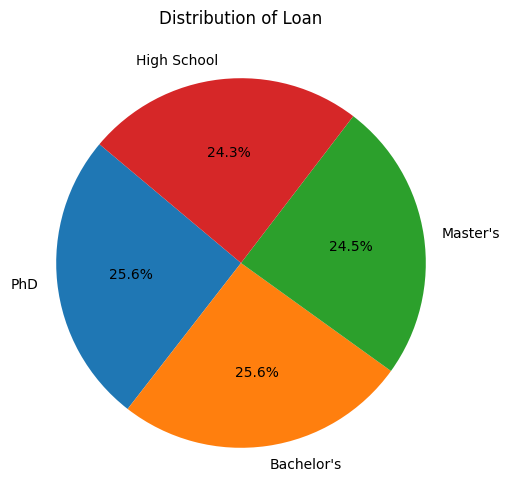

In [19]:
occupation_counts = Data_set['Education'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Loan')

<Axes: xlabel='Education', ylabel='LoanPurpose'>

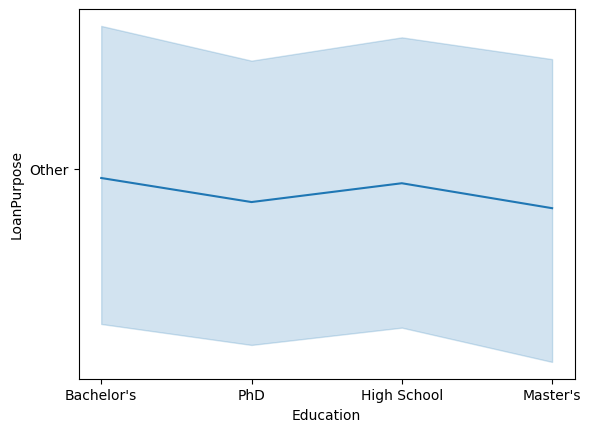

In [23]:
sns.lineplot(data=Data_set,x='Education',y='LoanPurpose')



<Axes: xlabel='LoanPurpose', ylabel='InterestRate'>

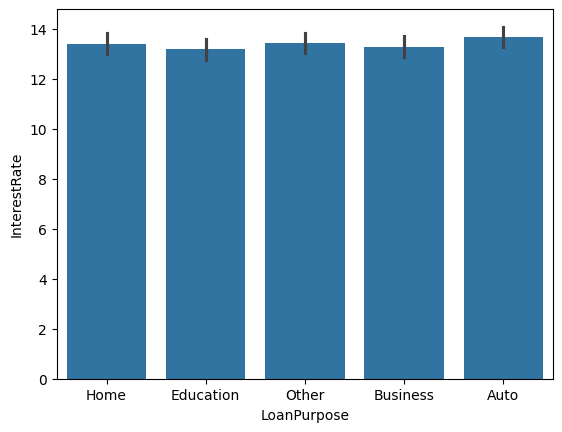

In [27]:
sns.barplot(data=Data_set,x='LoanPurpose',y='InterestRate')

In [9]:
def decimal_to_ratio(decimal_number):
    return Fraction(decimal_number).limit_denominator()
Data_set['DTIRatio']=Data_set['DTIRatio'].apply(decimal_to_ratio)

In [10]:
Data_set['DTIRatio']

96230       9/10
73292      43/50
45552      21/50
121878    41/100
192411    31/100
           ...  
191837      8/25
16690      14/25
244773    63/100
163950     11/25
57743      22/25
Name: DTIRatio, Length: 5000, dtype: object

<Axes: xlabel='EmploymentType', ylabel='MonthsEmployed'>

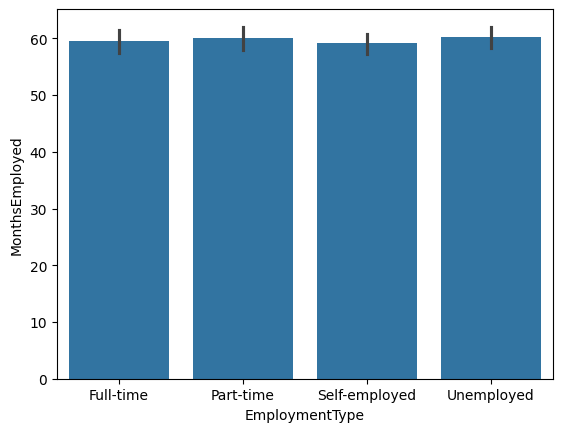

In [9]:
sns.barplot(data=Data_set,x='EmploymentType',y='MonthsEmployed')

<Axes: xlabel='EmploymentType', ylabel='CreditScore'>

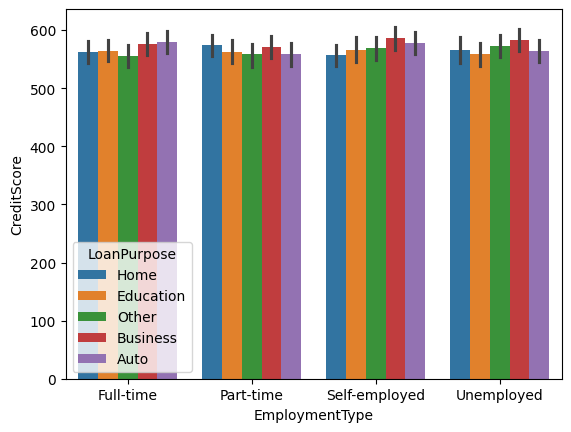

In [33]:
sns.barplot(data=Data_set, x='EmploymentType', y='CreditScore',hue='LoanPurpose')

<Axes: xlabel='EmploymentType', ylabel='LoanTerm'>

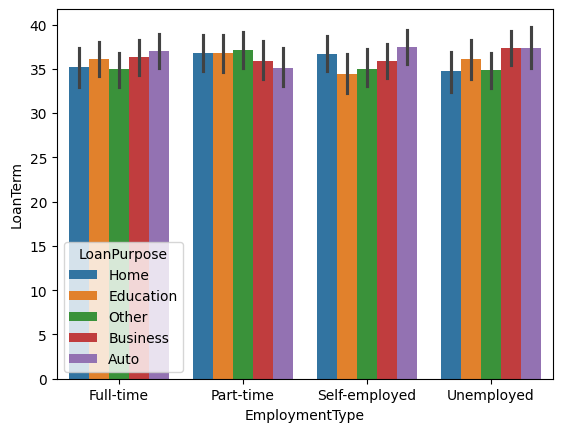

In [35]:
sns.barplot(data=Data_set, x='EmploymentType', y='LoanTerm',hue='LoanPurpose')

<Axes: xlabel='EmploymentType', ylabel='InterestRate'>

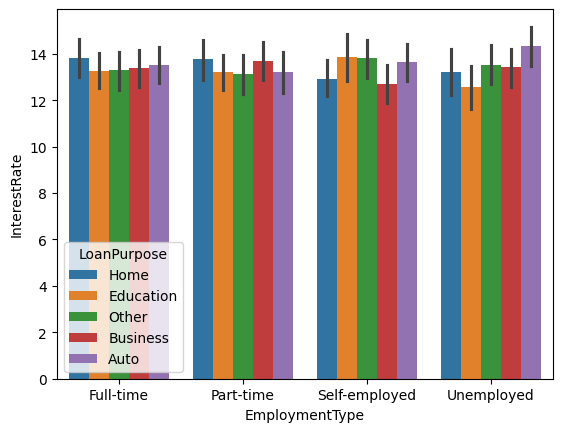

In [32]:
sns.barplot(data=Data_set, x='EmploymentType', y='InterestRate',hue='LoanPurpose')

<Axes: xlabel='EmploymentType', ylabel='LoanPurpose'>

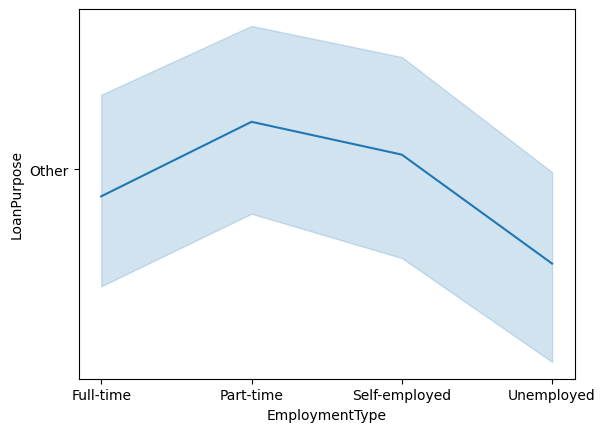

In [17]:
sns.lineplot(data=Data_set,x='EmploymentType',y='LoanPurpose')

<Axes: xlabel='EmploymentType', ylabel='CreditScore'>

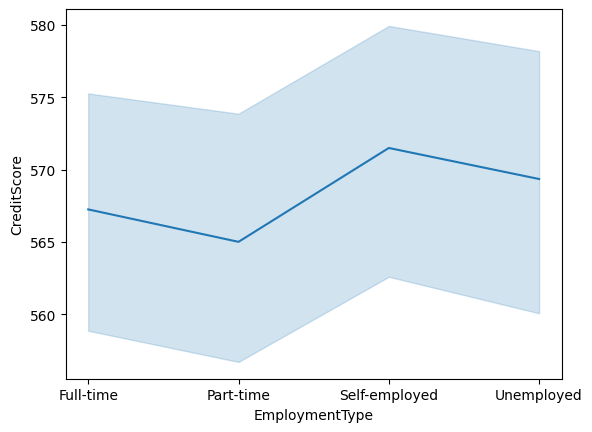

In [18]:
sns.lineplot(data=Data_set,x='EmploymentType',y='CreditScore')

<Axes: xlabel='EmploymentType', ylabel='Default'>

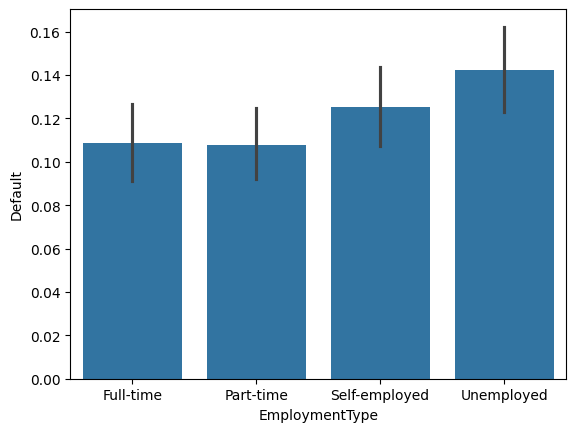

In [13]:
sns.barplot(data=Data_set, x='EmploymentType', y='Default')

<Axes: xlabel='MaritalStatus', ylabel='Default'>

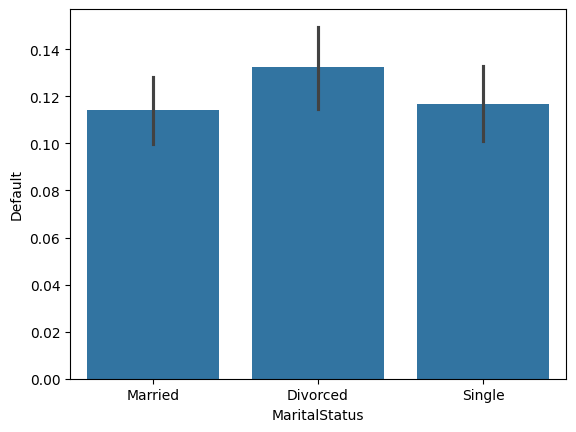

In [18]:
sns.barplot(data=Data_set, x='MaritalStatus', y='Default')

<Axes: xlabel='EmploymentType', ylabel='LoanPurpose'>

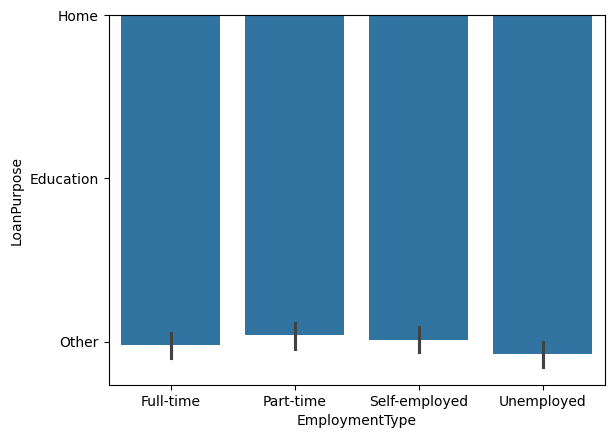

In [10]:
occupation_counts = Data_set['LoanPurpose'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Loan')

<Axes: xlabel='EmploymentType', ylabel='Default'>

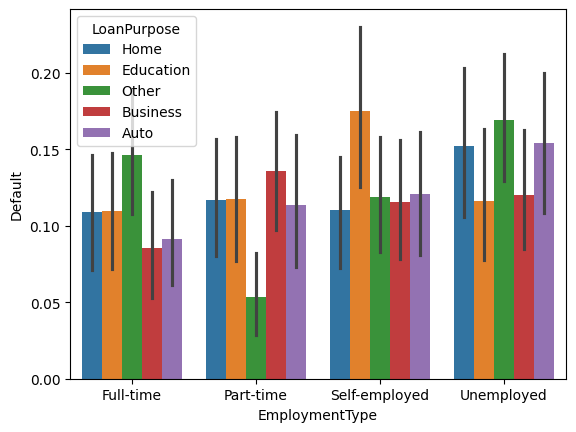

In [39]:
sns.barplot(data=Data_set, x='EmploymentType', y='Default',hue='LoanPurpose')

<Axes: xlabel='LoanPurpose', ylabel='InterestRate'>

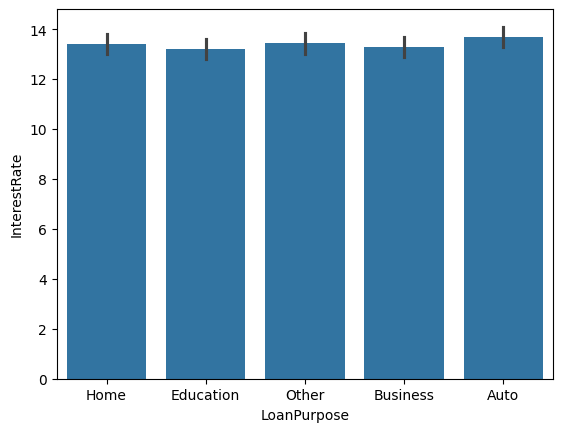

In [42]:
sns.barplot(data=Data_set, x='LoanPurpose', y='InterestRate')

Text(0.5, 1.0, 'Distribution of Loan')

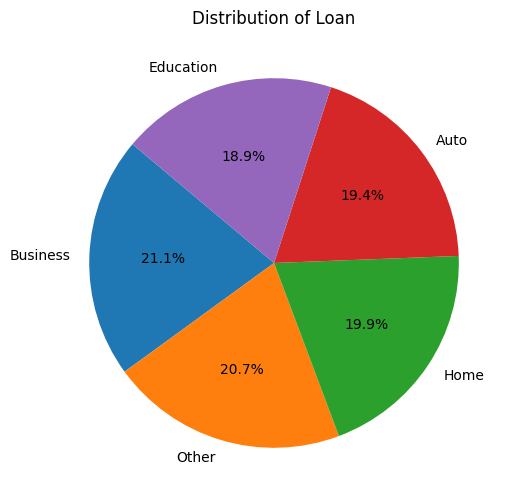

In [31]:
occupation_counts = Data_set['LoanPurpose'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Loan')

Text(0.5, 1.0, 'Distribution of Employment')

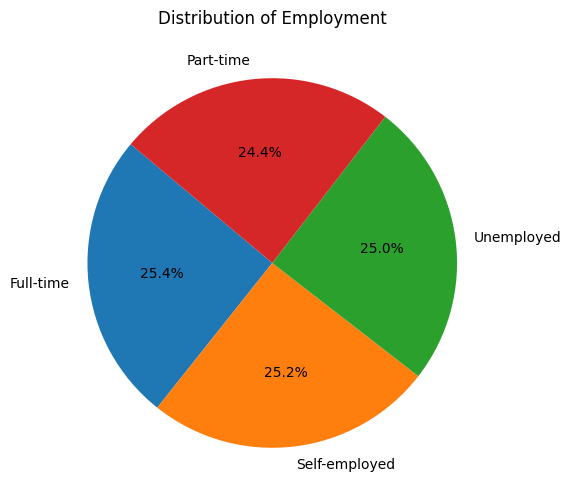

In [32]:
occupation_counts = Data_set['EmploymentType'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employment')

Text(0.5, 1.0, 'Distribution of Repayment')

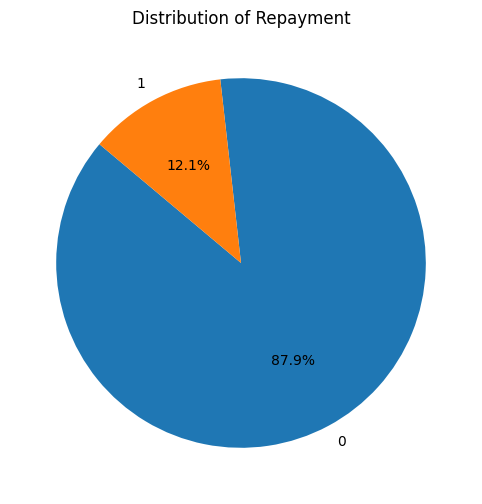

In [24]:
occupation_counts = Data_set['Default'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Repayment')

In [25]:
Data_set.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [64]:
df_1=Data_set[['Age','Income','LoanAmount','CreditScore','MonthsEmployed', 'DTIRatio', 'Education', 'EmploymentType','MaritalStatus','Default']]

In [65]:
df_1

,Income,CreditScore,MonthsEmployed,DTIRatio,Education,EmploymentType,MaritalStatus,Default
96230,52584,767,110,9/10,Bachelor's,Full-time,Married,0
73292,52120,719,86,43/50,PhD,Part-time,Divorced,0
45552,97782,629,26,21/50,High School,Self-employed,Divorced,0
121878,59024,482,114,41/100,High School,Full-time,Married,0
192411,136634,477,4,31/100,High School,Unemployed,Single,0
...,...,...,...,...,...,...,...,...
191837,142712,402,59,8/25,PhD,Full-time,Divorced,0
16690,124548,610,38,14/25,Master's,Part-time,Married,0
244773,103547,471,108,63/100,High School,Unemployed,Married,0
163950,69170,688,100,11/25,Master's,Full-time,Married,0


In [45]:
Data_set['EmploymentType'] = Data_set['EmploymentType'].replace({
    "Full-time": 1,
    "Part-time": 2,
    "Self-employed": 3,
    "Unemployed": 4
})

C:\Users\Hp\AppData\Local\Temp\ipykernel_2672\2066856774.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data_set['EmploymentType'] = Data_set['EmploymentType'].replace({


In [50]:
X = Data_set[['Age', 'Income', 'CreditScore', 'InterestRate']]
y = Data_set['Default']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the models
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the models
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg):.4f}")
print(f"F1 Score: {classification_report(y_test, y_pred_log_reg, output_dict=True)['1']['f1-score']:.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]):.4f}")
print()

print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score']:.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1]):.4f}")

Logistic Regression Metrics:
Accuracy: 0.8870
Precision: 0.7500
Recall: 0.0261
F1 Score: 0.0504
ROC-AUC: 0.7506

Random Forest Metrics:
Accuracy: 0.8750
Precision: 0.3214
Recall: 0.0783
F1 Score: 0.1259
ROC-AUC: 0.7130


In [79]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Features and target
X = Data_set[['Age', 'Income', 'CreditScore', 'InterestRate']]
y = Data_set['Default']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the models
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_predictions = lin_reg.predict(X_test)

# For classification
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)  # Note: This will throw an error because the target is continuous
log_reg_predictions = log_reg.predict(X_test)  # This line will also throw an error

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)  # This will also throw an error
rf_clf_predictions = rf_clf.predict(X_test)  # This line will also throw an error

# Evaluate Linear Regression
print("Linear Regression Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_test, lin_reg_predictions):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, lin_reg_predictions):.4f}")
print(f"R-squared: {r2_score(y_test, lin_reg_predictions):.4f}")
print()

# Evaluate classification models (assuming target was binary/categorical for demonstration)
# This is just for illustration; this part will not run successfully as-is with continuous targets.
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, log_reg_predictions):.4f}")
print(f"Precision: {precision_score(y_test, log_reg_predictions):.4f}")
print(f"Recall: {recall_score(y_test, log_reg_predictions):.4f}")
print(f"F1 Score: {classification_report(y_test, log_reg_predictions, output_dict=True)['1']['f1-score']:.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]):.4f}")
print()

print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, rf_clf_predictions):.4f}")
print(f"Precision: {precision_score(y_test, rf_clf_predictions):.4f}")
print(f"Recall: {recall_score(y_test, rf_clf_predictions):.4f}")
print(f"F1 Score: {classification_report(y_test, rf_clf_predictions, output_dict=True)['1']['f1-score']:.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1]):.4f}")


Linear Regression Metrics:
Mean Squared Error: 0.0934
Mean Absolute Error: 0.1991
R-squared: 0.0828

Logistic Regression Metrics:
Accuracy: 0.8870
Precision: 0.7500
Recall: 0.0261
F1 Score: 0.0504
ROC-AUC: 0.7506

Random Forest Metrics:
Accuracy: 0.8730
Precision: 0.2857
Recall: 0.0696
F1 Score: 0.1119
ROC-AUC: 0.7231


In [70]:
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

In [15]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Default',
       'Cluster_KMeans', 'Cluster_DBSCAN', 'PCA1', 'PCA2'],
      dtype='object')

K-Means Clustering Evaluation Metrics:
Silhouette Score: 0.3579
Davies-Bouldin Index: 0.9796



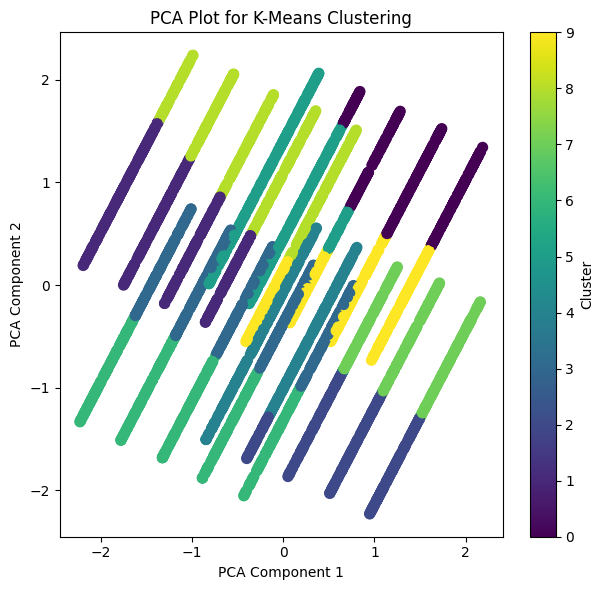

Explained Variance Ratio by PCA: [0.26087044 0.25294244]
Total Variance Explained by PCA: 0.5138


In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Load the dataset
data = Data_set

# Feature selection
X = data[[  'LoanAmount', 'LoanTerm','HasCoSigner','HasMortgage']]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means with chosen number of clusters (e.g., k=3)
k = 10
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# Add K-Means cluster labels to the original dataset
data['Cluster_KMeans'] = clusters_kmeans

# Evaluate K-Means Clustering
print("K-Means Clustering Evaluation Metrics:")
print(f"Silhouette Score: {silhouette_score(X_scaled, clusters_kmeans):.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_scaled, clusters_kmeans):.4f}")
print()


# Apply PCA for dimensionality reduction to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components and K-Means clusters to the original dataset
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

# Plot the PCA result for K-Means clustering
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data['PCA1'], data['PCA2'], c=data['Cluster_KMeans'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Plot for K-Means Clustering')

plt.tight_layout()
plt.show()

# Display variance explained by PCA
print(f"Explained Variance Ratio by PCA: {pca.explained_variance_ratio_}")
print(f"Total Variance Explained by PCA: {pca.explained_variance_ratio_.sum():.4f}")


In [44]:
Employment=Data_set.groupby("EmploymentType")["LoanPurpose"].value_counts()

In [51]:
Employment

EmploymentType  LoanPurpose
Full-time       Education      264
                Auto           262
                Other          260
                Business       246
                Home           239
Part-time       Business       258
                Home           249
                Education      247
                Other          244
                Auto           220
Self-employed   Home           290
                Business       269
                Other          253
                Auto           248
                Education      200
Unemployed      Business       283
                Other          278
                Auto           240
                Education      233
                Home           217
Name: count, dtype: int64

In [69]:
employment_counts = df.groupby(['EmploymentType', 'LoanPurpose', 'Default']).size().reset_index(name='Count')

In [70]:
employment_counts

,EmploymentType,LoanPurpose,Default,Count
0,Full-time,Auto,0,238
1,Full-time,Auto,1,24
2,Full-time,Business,0,225
3,Full-time,Business,1,21
4,Full-time,Education,0,235
5,Full-time,Education,1,29
6,Full-time,Home,0,213
7,Full-time,Home,1,26
8,Full-time,Other,0,222
9,Full-time,Other,1,38


In [73]:
employment_counts[employment_counts['EmploymentType'] == 'Unemployed']

,EmploymentType,LoanPurpose,Default,Count
30,Unemployed,Auto,0,203
31,Unemployed,Auto,1,37
32,Unemployed,Business,0,249
33,Unemployed,Business,1,34
34,Unemployed,Education,0,206
35,Unemployed,Education,1,27
36,Unemployed,Home,0,184
37,Unemployed,Home,1,33
38,Unemployed,Other,0,231
39,Unemployed,Other,1,47


In [67]:
Loan=Data_set.groupby("LoanPurpose")["Default"].value_counts()

In [68]:
Loan

LoanPurpose  Default
Auto         0          854
             1          116
Business     0          935
             1          121
Education    0          824
             1          120
Home         0          875
             1          120
Other        0          907
             1          128
Name: count, dtype: int64